In [1]:
# 모듈 로딩
import os
import cv2
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from tensorflow.keras import Sequential
from sklearn.utils import all_estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from urllib.request import urlopen,Request,urlretrieve
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

In [2]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50,50)[0].tolist()
        else:
            n_list=n.reshape(-1,50,50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [3]:
# 동적 웹 크롤링으로 사진저장 함수
def image_save(urlpath,charname):
    driver = webdriver.Chrome('chromedriver.exe') # C:/Users/User/EXAM_PANDAS/DAY-0630/DAY-0920
    #driver = webdriver.Chrome('C:\\workspace’) # Windows 사용자의 설치 경로
    driver.get(urlpath)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    driver.quit()

    # 태그-속성 찾기
    image_finds=soup.select("div.bRMDJf img")
    
    # 이미지의 url찾기
    image=[]
    for image_find in image_finds:
        try:
            image.append(image_find['src'])
            image.append(image_find['data-src'])
        except:
            pass
    
    # 폴더 만들기
    if not os.path.exists('./trashdata'+charname):
        os.makedirs('./trashdata'+charname)
    
    # 파일 저장하기
    for i in range(0,len(image)):
        urlretrieve(image[i],'./trashdata'+charname+'/'+charname+str(i)+'.png')

    # 파일 크기 조절
    for png in os.listdir('./trashdata'+charname):
        Image.open('./trashdata'+charname+'/'+png).resize((50,50)).save('./trashdata'+charname+'/'+png)

In [4]:
# 메탈 쓰레기
image_save('https://www.google.com/search?q=%EB%A9%94%ED%83%88%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYgMTaD8UrBJjZcoXB0ejjjZXE0og:1667533346124&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiisPzlzZP7AhXaNt4KHdZ5DHUQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5','metal')

# 금속 사진
image_save('https://www.google.com/search?q=%EA%B8%88%EC%86%8D%EC%82%AC%EC%A7%84&sxsrf=ALiCzsZWUgCli9HM9aXViWTb-sQ_BLsMUw:1667585448154&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjE8JPyj5X7AhVX_GEKHY25DhYQ_AUoAXoECAIQAw&biw=1707&bih=956&dpr=1.5', 'metal1')

# 유리 쓰레기
image_save('https://www.google.com/search?q=%EC%9C%A0%EB%A6%AC%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsaq14G6Dozn2OoZypk41jDZtJOT7g:1667533415257&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjh-PeGzpP7AhVcl1YBHd5eDegQ_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'glass')

# 유리 사진
image_save('https://www.google.com/search?q=%EC%9C%A0%EB%A6%AC%EB%B3%91%EC%82%AC%EC%A7%84&sxsrf=ALiCzsboGcYraCGzj5JGtEPkMNMt7Es1fQ:1667585399573&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjo4P7aj5X7AhVHVN4KHZQ4CnQQ_AUoAXoECAMQAw&biw=1707&bih=956&dpr=1.5', 'glass1')

# 종이 쓰레기
image_save('https://www.google.com/search?q=%EC%A2%85%EC%9D%B4%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYC9L5qJdGyqmMqqjakLIj1HulBow:1667533460827&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiHrNWczpP7AhUGmFYBHVyVBTUQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5', 'paper')

# 종이 사진 
image_save('https://www.google.com/search?q=%EC%A2%85%EC%9D%B4%EC%82%AC%EC%A7%84&sxsrf=ALiCzsaqos5SvKAa7v47ezTeSP84RZsJyw:1667585343005&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjfiILAj5X7AhUC3mEKHWD5AvIQ_AUoAXoECAEQAw&biw=1707&bih=956&dpr=1.5', 'paper1')

# 플라스틱 쓰레기
image_save('https://www.google.com/search?q=%ED%94%8C%EB%9D%BC%EC%8A%A4%ED%8B%B1%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsbGqKr6AF6F6TpdksGB2H7Kl3qI1A:1667533505972&source=lnms&tbm=isch&sa=X&ved=2ahUKEwit0JiyzpP7AhXfrlYBHZSfAi0Q_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'plastic')

# 플라스틱류 사진
image_save('https://www.google.com/search?q=%ED%94%8C%EB%9D%BC%EC%8A%A4%ED%8B%B1+%EC%82%AC%EC%A7%84&sxsrf=ALiCzsaEUoBi3eo3fly-x8K8avK85xigYA:1667585554739&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj8sP2kkJX7AhW5gFYBHY0uBu4Q_AUoAXoECAIQAw&biw=1707&bih=956&dpr=1.5', 'plastic1')

# 음식물 쓰레기
image_save('https://www.google.com/search?q=%EC%9D%8C%EC%8B%9D%EB%AC%BC+%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsYd6U9ofgUrESbI6v60-pYMq5hkfQ:1667533565760&source=lnms&tbm=isch&sa=X&ved=2ahUKEwix5tnOzpP7AhVSm1YBHc5wBuQQ_AUoAXoECAIQAw&biw=852&bih=946&dpr=1.5', 'food')

# 음식쓰레기
image_save('https://www.google.com/search?q=%EC%9D%8C%EC%8B%9D%EB%AC%BC&sxsrf=ALiCzsbpg_iXM3H21NgxkNGLAKPypaXmag:1667585630769&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiX8J3JkJX7AhVvpVYBHTnkDxEQ_AUoAXoECAEQAw&biw=1707&bih=956&dpr=1.5', 'food1')

# 건전지 쓰레기
image_save('https://www.google.com/search?q=%EA%B1%B4%EC%A0%84%EC%A7%80+%EC%93%B0%EB%A0%88%EA%B8%B0&sxsrf=ALiCzsb6pS2n5n6mUXzgnSm8ZcFzlaL-SQ:1667533619052&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi2zY7ozpP7AhW_plYBHcylCLMQ_AUoAXoECAEQAw&biw=852&bih=946&dpr=1.5', 'battery')

# 건전지
image_save('https://www.google.com/search?q=%EA%B1%B4%EC%A0%84%EC%A7%80&sxsrf=ALiCzsbZJclN1mKOFnYKaUZukwAFtnkF5g:1667585679875&source=lnms&tbm=isch&sa=X&ved=2ahUKEwixitPgkJX7AhXAtlYBHcXMAlUQ_AUoAXoECAEQAw&biw=1707&bih=956&dpr=1.5', 'battery1')

In [5]:
def rota_save_bw(color,foldname,data):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./'+data+'/'):
        for rot in rotation:
            img=np.array(Image.open('./'+data+'/'+file).convert(color))
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [6]:
# 크롤링 데이터 로테이션시키는 함수
def rota_save_co(color,foldname,data):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./'+data+'/'):
        for rot in rotation:
            img=np.array(Image.open('./'+data+'/'+file).convert(color))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [7]:
# # 크롤링 데이터 로테이션시키는 함수
# def rota_save(color,foldname,data):
#     # 폴더 만들기
#     if not os.path.exists('./'+foldname):
#         os.makedirs(foldname)
    
#     rotation=[45,90,135,180,225,270,315]
#     for file in os.listdir('./'+data+'/'):
#         for rot in rotation:
#             img=np.array(Image.open('./'+file).convert(color))
#             rows,cols = img.shape[0:2]
#             ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
#             ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
#             # 이미지 저장
#             filename=f"{file}_ro{str(rot)}"
#             cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [8]:
# 크롤링 데이터 convert 함수
def data_con(color,foldname):
    for file in os.listdir('./data/'):
        img=Image.open('./data/'+file).convert(color).save('./'+foldname+'/'+file)

In [9]:
# 흑백으로 로테이션
rota_save_bw('L','blwh','trashdatametal')
rota_save_bw('L','blwh','trashdatametal1')
rota_save_bw('L','blwh','trashdataglass')
rota_save_bw('L','blwh','trashdataglass1')
rota_save_bw('L','blwh','trashdatapaper')
rota_save_bw('L','blwh','trashdatapaper1')
rota_save_bw('L','blwh','trashdataplastic')
rota_save_bw('L','blwh','trashdataplastic1')
rota_save_bw('L','blwh','trashdatafood')
rota_save_bw('L','blwh','trashdatafood1')
rota_save_bw('L','blwh','trashdatabattery')
rota_save_bw('L','blwh','trashdatabattery1')

In [10]:
# # 원본사진 흑백으로
# data_con('L','blwh')

In [11]:
# rgb로 로테이션
rota_save_co('RGB','rgb','trashdatametal')
rota_save_co('RGB','rgb','trashdatametal1')
rota_save_co('RGB','rgb','trashdataglass')
rota_save_co('RGB','rgb','trashdataglass1')
rota_save_co('RGB','rgb','trashdatapaper')
rota_save_co('RGB','rgb','trashdatapaper1')
rota_save_co('RGB','rgb','trashdataplastic')
rota_save_co('RGB','rgb','trashdataplastic1')
rota_save_co('RGB','rgb','trashdatafood')
rota_save_co('RGB','rgb','trashdatafood1')
rota_save_co('RGB','rgb','trashdatabattery')
rota_save_co('RGB','rgb','trashdatabattery1')

In [12]:
# # 원본사진 색깔로
# data_con('RGB','rgb','trashdatametal')
# data_con('RGB','rgb','trashdataglass')
# data_con('RGB','rgb','trashdatapaper')
# data_con('RGB','rgb','trashdataplastic')
# data_con('RGB','rgb','trashdatafood')
# data_con('RGB','rgb','trashdatabattery')

In [13]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50*50)[0].tolist()
        else:
            n_list=n.reshape(-1,50*50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [14]:
blwh=solution('blwh')
blwh

array([[0.03921569, 0.25882353, 0.43529412, ..., 0.57254902, 0.29803922,
        0.09411765],
       [0.72941176, 0.75294118, 0.87843137, ..., 0.38431373, 0.36078431,
        0.36862745],
       [0.01960784, 0.20392157, 0.45882353, ..., 0.35294118, 0.34901961,
        0.34117647],
       ...,
       [0.61568627, 0.53333333, 0.5372549 , ..., 0.7254902 , 0.70588235,
        0.71764706],
       [0.37647059, 0.43529412, 0.57254902, ..., 0.56078431, 0.40784314,
        0.27843137],
       [0.58431373, 0.55686275, 0.5254902 , ..., 0.65882353, 0.69019608,
        0.65882353]])

In [15]:
print(f"흑백 사진 데이터 모양 {blwh.shape}")

흑백 사진 데이터 모양 (1834, 2500)


In [16]:
rgb=solution('rgb')
rgb

array([[[0.04313725, 0.03921569, 0.03921569],
        [0.27058824, 0.25490196, 0.24313725],
        [0.45882353, 0.42745098, 0.40784314],
        ...,
        [0.36862745, 0.7372549 , 0.28627451],
        [0.13333333, 0.41960784, 0.10980392],
        [0.01960784, 0.14117647, 0.05098039]],

       [[0.63921569, 0.80392157, 0.58039216],
        [0.65882353, 0.83529412, 0.57647059],
        [0.88627451, 0.88627451, 0.80784314],
        ...,
        [0.37647059, 0.39607843, 0.34509804],
        [0.38039216, 0.35686275, 0.34901961],
        [0.38431373, 0.36470588, 0.35294118]],

       [[0.02352941, 0.01960784, 0.00784314],
        [0.21960784, 0.20784314, 0.14117647],
        [0.45882353, 0.47843137, 0.36862745],
        ...,
        [0.37647059, 0.34509804, 0.3372549 ],
        [0.36862745, 0.34117647, 0.33333333],
        [0.36078431, 0.3372549 , 0.3254902 ]],

       ...,

       [[0.68235294, 0.59215686, 0.56862745],
        [0.54901961, 0.54117647, 0.4627451 ],
        [0.55294118, 0

In [17]:
print(f"컬러 사진 데이터 모양 {rgb.shape}")

컬러 사진 데이터 모양 (1834, 2500, 3)


In [18]:
rgb

array([[[0.04313725, 0.03921569, 0.03921569],
        [0.27058824, 0.25490196, 0.24313725],
        [0.45882353, 0.42745098, 0.40784314],
        ...,
        [0.36862745, 0.7372549 , 0.28627451],
        [0.13333333, 0.41960784, 0.10980392],
        [0.01960784, 0.14117647, 0.05098039]],

       [[0.63921569, 0.80392157, 0.58039216],
        [0.65882353, 0.83529412, 0.57647059],
        [0.88627451, 0.88627451, 0.80784314],
        ...,
        [0.37647059, 0.39607843, 0.34509804],
        [0.38039216, 0.35686275, 0.34901961],
        [0.38431373, 0.36470588, 0.35294118]],

       [[0.02352941, 0.01960784, 0.00784314],
        [0.21960784, 0.20784314, 0.14117647],
        [0.45882353, 0.47843137, 0.36862745],
        ...,
        [0.37647059, 0.34509804, 0.3372549 ],
        [0.36862745, 0.34117647, 0.33333333],
        [0.36078431, 0.3372549 , 0.3254902 ]],

       ...,

       [[0.68235294, 0.59215686, 0.56862745],
        [0.54901961, 0.54117647, 0.4627451 ],
        [0.55294118, 0

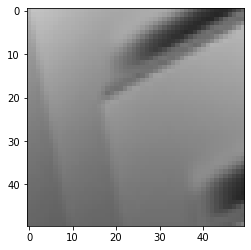

In [19]:
# 그래프 그려보기 => 컬러
plt.imshow(rgb[1100].reshape(50,50,3))

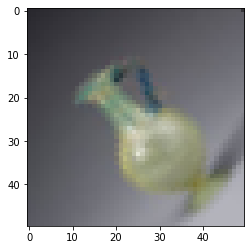

In [20]:
# 흑백 그래프 그려보기 => 흑백
plt.imshow(rgb[768].reshape(50,50,3),cmap='gray')

In [21]:
# 정규식을 활용한 브랜드 이름 분리
import re

brand_name=[]
for b in os.listdir('./rgb/'):
    l=re.split(r'[0-9]',b)[0]
    brand_name.append(l)
brand_name

['battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'battery',
 'ba

In [22]:
# 브랜드 이름/라벨로 타겟으로 저장
com_brand='angelinus'
i=0
target=[]
for brand in brand_name:
    if com_brand==brand:
        target.append([brand,i])
    else:
        i+=1
        com_brand=brand
        target.append([brand,i])

In [23]:
target_df=pd.DataFrame(target,columns=['name','label'])
target_df

,name,label
0,battery,1
1,battery,1
2,battery,1
3,battery,1
4,battery,1
...,...,...
1829,plastic,6
1830,plastic,6
1831,plastic,6
1832,plastic,6


In [24]:
target_df.iloc[1100,:]

name     metal
label        4
Name: 1100, dtype: object

In [25]:
target_df.to_csv('target.csv')

In [26]:
# 수정된 타겟 데이터 불러오기
target_final_df=pd.read_csv('target.csv')
target=np.array(target_final_df.label)

In [27]:
print(f"타켓 데이터 모양 {target.shape}")

타켓 데이터 모양 (1834,)


In [28]:
# 브랜드 이름 고유값
brand=sorted(list(set(target_final_df.name)))
brand

['battery', 'food', 'glass', 'metal', 'paper', 'plastic']

In [29]:
# 흑백데이터 훈련/검증/테스트
train_x_bw,test_x_bw,train_y,test_y=train_test_split(blwh,target,random_state=42,test_size=0.2,stratify=target)
train_x_bw,val_x_bw,train_y,val_y=train_test_split(train_x_bw,train_y,random_state=42,test_size=0.2,stratify=train_y)

In [30]:
print(f"train_x_bw {train_x_bw.shape}, train_y {train_y.shape}")
print(f"val_x_bw {val_x_bw.shape}, train_y {val_y.shape}")
print(f"test_x_bw {test_x_bw.shape}, train_y {test_y.shape}")

train_x_bw (1173, 2500), train_y (1173,)
val_x_bw (294, 2500), train_y (294,)
test_x_bw (367, 2500), train_y (367,)


In [31]:
rgb_fl=rgb.reshape(-1,2500*3)
rgb_fl.shape

(1834, 7500)

In [32]:
# 컬러데이터 훈련/검증/테스트
train_x_co,test_x_co,train_y,test_y=train_test_split(rgb_fl,target,random_state=42,test_size=0.2,stratify=target)
train_x_co,val_x_co,train_y,val_y=train_test_split(train_x_co,train_y,random_state=42,test_size=0.2,stratify=train_y)

In [33]:
print(f"train_x_co {train_x_co.shape}, train_y {train_y.shape}")
print(f"val_x_co {val_x_co.shape}, val_y {val_y.shape}")
print(f"test_x_co {test_x_co.shape}, test_y {test_y.shape}")

train_x_co (1173, 7500), train_y (1173,)
val_x_co (294, 7500), val_y (294,)
test_x_co (367, 7500), test_y (367,)


In [34]:
from sklearn.decomposition import PCA

In [35]:
pca=PCA()

In [36]:
pca.fit(train_x_bw)

PCA()

In [37]:
# 분산비율
pca.explained_variance_ratio_

array([4.82493507e-01, 5.16948654e-02, 4.19936958e-02, ...,
       3.24474954e-33, 3.24474954e-33, 2.18476401e-33])

In [38]:
# 설명력
cumsum=np.round(np.cumsum(pca.explained_variance_ratio_),4)
d=np.argmax(cumsum>=0.95)+1 # 최적 주성분 개수

print(f"주성분 누적 설명정도 {cumsum}")
print(f"주성분 개수(차원): {d}")

주성분 누적 설명정도 [0.4825 0.5342 0.5762 ... 1.     1.     1.    ]
주성분 개수(차원): 142


In [39]:
# # 설명력 그래프 그려보기
# plt.figure(figsize=(15,5))
# plt.plot(range(1,2501),cumsum)
# plt.plot(d,0.95,'ro')
# plt.plot([d,d],[0,0.95],'g--')
# plt.xlim(1,2501)
# plt.xlabel('Dimention')
# plt.ylabel('Explained Variance')
# plt.show()

In [40]:
# 최적의 주성분 개수로 다시 모델 생성
pca=PCA(n_components=d)
pca.fit(train_x_bw)

PCA(n_components=142)

In [41]:
# 주성분 개수 마다 모델과 예측값 구하기 함수
def pca_pre(n_pca,data):
    pca=PCA(n_components=n_pca)
    pca.fit(train_x_bw)
    pre_out=pca.transform(data)

    return pca, pre_out

In [42]:
# 원본데이터와 예측데이터의 그래프 비교 함수
def compimage(mopca,raw,comp):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.imshow(raw.reshape(50,50,1),cmap='gray')
    plt.title('원본데이터')
    
    re_comp=mopca.inverse_transform(comp)
    plt.subplot(1,2,2)
    plt.imshow(re_comp.reshape(50,50,1),cmap='gray')
    plt.title('PCA된 그림')
    plt.tight_layout()
    plt.show()

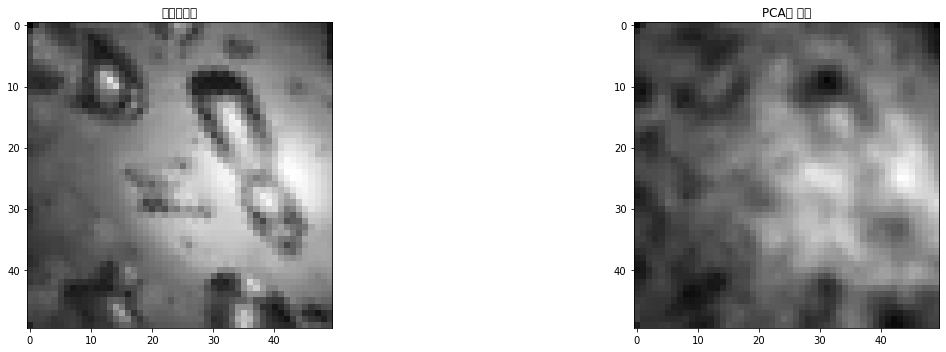

In [43]:
mopca,comp=pca_pre(d,test_x_bw)
compimage(mopca,test_x_bw[1],comp[1])

In [44]:
# 주성분 개수마다 그래프 그려보기
def pca_grape(n_list,data,index):
    plt.figure(figsize=(20,10))
    r=2
    c=5
    for n in range(r):
        for k in range(c):
            if n_list[n*c+k]==1:
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(data[index].reshape(50,50,1),cmap='gray')
                plt.title('원본데이터')
            else:
                pca=PCA(n_components=n_list[n*c+k])
                pca.fit(train_x_bw)
                pre_out=pca.transform(data)

                re_comp=pca.inverse_transform(pre_out[index])
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(re_comp.reshape(50,50,1),cmap='gray')
                plt.title(f'주성분 개수가 {n_list[n*c+k]}일때')
    plt.tight_layout()
    plt.show()

In [45]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[0]]}")
# pca_grape([1,30,40,50,100,200,500,834,1000,2000],test_x_bw,0)

In [46]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[100]]}")
# pca_grape([1,25,60,100,200,345,567,834,900,2500],test_x_bw,100)

## 컬러

In [47]:
pcacolor=PCA()

In [48]:
pcacolor.fit(train_x_co)

PCA()

In [49]:
# 누적 설명력과 최적 차원개수 구하기
cumsum_co=np.round(np.cumsum(pcacolor.explained_variance_ratio_),6)
d=np.argmax(cumsum_co>=0.95)+1

print(f"누적 설명력은 {cumsum_co}")
print(f"최적의 차원 개수는 {d}입니다.")

누적 설명력은 [0.447808 0.4967   0.535539 ... 1.       1.       1.      ]
최적의 차원 개수는 196입니다.


In [50]:
# # 누적 설명력 그래프 그리기
# plt.figure(figsize=(20,5))
# plt.plot(range(1,2501),cumsum)
# plt.plot(d,0.95,'ro')
# plt.plot([d,d],[0,0.95],'g--')
# plt.xlim(1,2501)
# plt.show()

In [51]:
# 주성분 개수마다 그래프 그려보기 => 색깔
def pca_grape(n_list,data,index):
    plt.figure(figsize=(20,10))
    r=2
    c=5
    for n in range(r):
        for k in range(c):
            if n_list[n*c+k]==1:
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(data[index].reshape(50,50,3))
                plt.title('원본데이터')
            else:
                pca=PCA(n_components=n_list[n*c+k])
                pca.fit(train_x_co)
                pre_out=pca.transform(data)

                re_comp=pca.inverse_transform(pre_out[index])
                plt.subplot(r,c,n*c+k+1)
                plt.imshow(re_comp.reshape(50,50,3),vmin=0,vmax=1)
                plt.title(f'주성분 개수가 {n_list[n*c+k]}일때')
    plt.tight_layout()
    plt.show()

In [52]:
# print(f"이 사진의 브랜드 이름은 {brand[test_y[10]]}")
# pca_grape([1,10,59,167,540,900,2000,2300,2400,2450],test_x_co,62)

In [53]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras import layers,callbacks,Sequential

In [54]:
# # 사전 학습된 VGG16모델 불러오기
# model=VGG16(weights='imagenet',include_top=False,input_shape=(50,50,3))

In [55]:
# # 모델 확인
# model.summary(show_trainable=True)

In [56]:
# remodel = Sequential()
# remodel.add(model)
# remodel.add(layers.Flatten())
# remodel.add(layers.Dense(512,activation='relu'))
# remodel.add(layers.Dropout(0.5))
# remodel.add(layers.Dense(216,activation='relu'))
# remodel.add(layers.Dropout(0.5))
# remodel.add(layers.Dense(26, activation='softmax'))

In [57]:
# remodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [58]:
# modelES=callbacks.EarlyStopping(monitor='val_accuracy',patience=5)
# modelMC=callbacks.ModelCheckpoint('best_model',save_best_only=True,save_weights_only=True)

In [59]:
# remodel.summary()

In [60]:
train_xx = train_x_co.reshape(-1,50,50,3)
test_xx = test_x_co.reshape(-1,50,50,3)
val_xx = val_x_co.reshape(-1,50,50,3)

In [61]:
train_xx.shape

(1173, 50, 50, 3)

In [62]:
train_y.shape

(1173,)

In [63]:
# remodel.fit(train_xx,train_y,callbacks=[modelES,modelMC],validation_data=(val_xx,val_y),epochs=100)

## 모델

In [203]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.python.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [204]:
image_size = 150
input_shape = (image_size, image_size, 3)

resize_and_rescale = Sequential([
    preprocessing.Resizing(image_size, image_size),
    preprocessing.Rescaling(1./255)
])

In [205]:
model=Sequential()
model.add(resize_and_rescale)
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(MaxPool2D())
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(128, kernel_size=3, padding='same'))
# model.add(Conv2D(256, kernel_size=3, padding='same'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(12, activation='softmax'))

In [206]:
# model.summary()

In [207]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)
train_datagen.fit(train_xx)

In [208]:
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=500)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', save_best_only=True)

In [209]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [210]:
History1 = model.fit_generator(train_datagen.flow(train_xx,train_y, batch_size=32),
                              epochs = 15, validation_data = (val_xx,val_y),
                              verbose = 1, steps_per_epoch=train_xx.shape[0] // 32,
                               callbacks=[es, mc])

Epoch 1/15
36/36 [==============================] - 44s 1s/step - loss: 1.9590 - accuracy: 0.1630 - val_loss: 1.8502 - val_accuracy: 0.1599
Epoch 2/15
36/36 [==============================] - 49s 1s/step - loss: 1.8178 - accuracy: 0.1814 - val_loss: 1.8358 - val_accuracy: 0.1939
Epoch 3/15
36/36 [==============================] - 52s 1s/step - loss: 1.8088 - accuracy: 0.1745 - val_loss: 1.8014 - val_accuracy: 0.1939
Epoch 4/15
36/36 [==============================] - 70s 2s/step - loss: 1.7783 - accuracy: 0.2130 - val_loss: 1.9432 - val_accuracy: 0.1905
Epoch 5/15
36/36 [==============================] - 75s 2s/step - loss: 1.7004 - accuracy: 0.2603 - val_loss: 1.8072 - val_accuracy: 0.2517
Epoch 6/15
36/36 [==============================] - 85s 2s/step - loss: 1.6699 - accuracy: 0.2533 - val_loss: 1.6853 - val_accuracy: 0.2857
Epoch 7/15
36/36 [==============================] - 69s 2s/step - loss: 1.6147 - accuracy: 0.2936 - val_loss: 1.6267 - val_accuracy: 0.2551
Epoch 8/15
36/36 [==

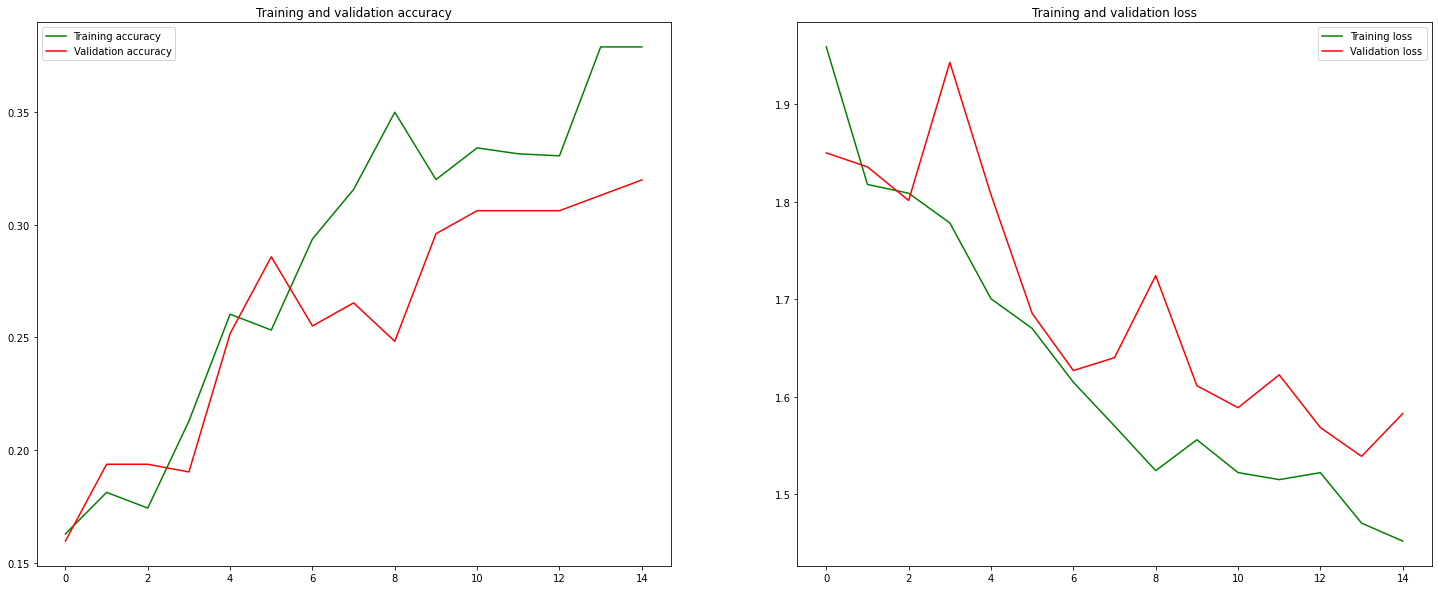

In [211]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(25, 10))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend(fontsize=10)
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(History1)

In [212]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [213]:
test_x_co.shape

(367, 7500)

In [214]:
test_y.shape

(367,)

In [215]:
model.evaluate(test_xx, test_y)

12/12 [==============================] - 3s 253ms/step - loss: 1.5179 - accuracy: 0.3760


[1.517946720123291, 0.3760218024253845]

In [216]:
pre_y=model.predict(test_xx[5].reshape(-1, 50, 50, 3))

1/1 [==============================] - 0s 101ms/step


In [217]:
pre_y.round(2)

array([[0.  , 0.32, 0.2 , 0.08, 0.21, 0.12, 0.06, 0.  , 0.  , 0.  , 0.  ,
        0.  ]], dtype=float32)

In [218]:
test_y[5]

1

In [219]:
df = pd.DataFrame(target_df.name.unique())
df['label'] = target_df.label.unique()
df.columns = ['Brand', 'Label']
df

,Brand,Label
0,battery,1
1,food,2
2,glass,3
3,metal,4
4,paper,5
5,plastic,6


## 새로운 사진으로 예측

In [220]:
def img_preprocessing(FILENAME):
    img = Image.open(FILENAME)
    img = img.resize((50,50))
    img = np.array(img)
    img = img.reshape(-1, 50, 50, 3)
    plt.imshow(img.reshape(50,50,3))
    print(df.Brand[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 87ms/step
plastic


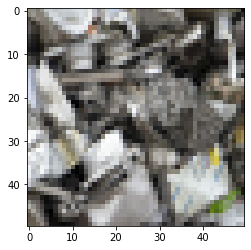

In [221]:
a=img_preprocessing('./test.img/metal1.JPG')

1/1 [==============================] - 0s 34ms/step
plastic


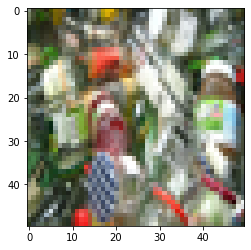

In [222]:
b=img_preprocessing('./test.img/glass1.JPG')

1/1 [==============================] - 0s 34ms/step
food


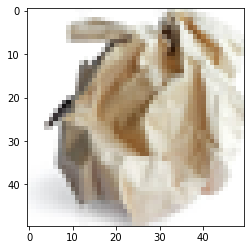

In [223]:
c=img_preprocessing('./test.img/paper1.JPG')

1/1 [==============================] - 0s 42ms/step
food


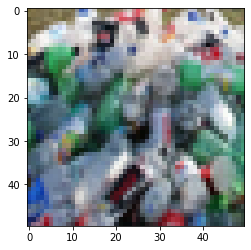

In [224]:
d=img_preprocessing('./test.img/plastic1.JPG')

1/1 [==============================] - 0s 33ms/step
plastic


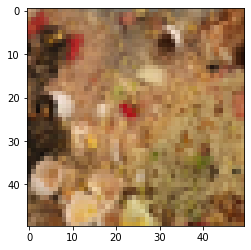

In [225]:
e=img_preprocessing('./test.img/food1.JPG')

1/1 [==============================] - 0s 34ms/step
plastic


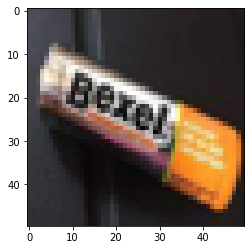

In [226]:
f=img_preprocessing('./test.img/battery1.JPG')

## 이미지 띄어보기

In [137]:
metal_img = Image.open('./trashdatametal/metal0.png')
metal_img1 = Image.open('./trashdatametal1/metal10.png')
glass_img = Image.open('./trashdataglass/glass0.png')
glass_img1 = Image.open('./trashdataglass1/glass10.png')
paper_img = Image.open('./trashdatapaper/paper0.png')
paper_img1 = Image.open('./trashdatapaper1/paper10.png')
plastic_img = Image.open('./trashdataplastic/plastic0.png')
plastic_img1 = Image.open('./trashdataplastic1/plastic10.png')
food_img = Image.open('./trashdatafood/food0.png')
food_img1 = Image.open('./trashdatafood1/food10.png')
battery_img = Image.open('./trashdatabattery/battery0.png')
battery_img1 = Image.open('./trashdatabattery1/battery10.png')

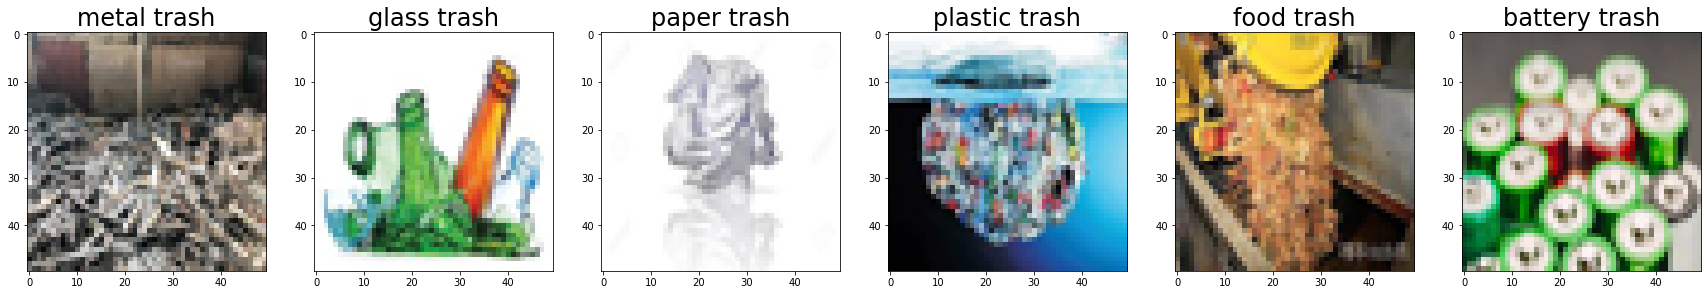

In [138]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 6, 1)
plt.imshow(metal_img)
plt.title('metal trash', fontsize=24)

plt.subplot(1, 6, 2)
plt.imshow(glass_img)
plt.title('glass trash', fontsize=24)

plt.subplot(1, 6, 3)
plt.imshow(paper_img)
plt.title('paper trash', fontsize=24)

plt.subplot(1, 6, 4)
plt.imshow(plastic_img)
plt.title('plastic trash', fontsize=24)

plt.subplot(1, 6, 5)
plt.imshow(food_img)
plt.title('food trash', fontsize=24)

plt.subplot(1, 6, 6)
plt.imshow(battery_img)
plt.title('battery trash', fontsize=24)
plt.show()

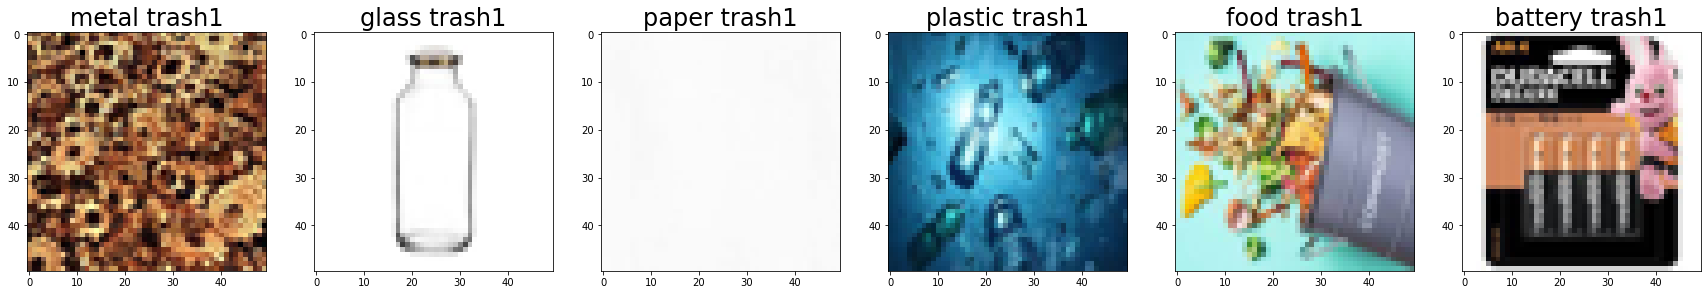

In [139]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 6, 1)
plt.imshow(metal_img1)
plt.title('metal trash1', fontsize=24)

plt.subplot(1, 6, 2)
plt.imshow(glass_img1)
plt.title('glass trash1', fontsize=24)

plt.subplot(1, 6, 3)
plt.imshow(paper_img1)
plt.title('paper trash1', fontsize=24)

plt.subplot(1, 6, 4)
plt.imshow(plastic_img1)
plt.title('plastic trash1', fontsize=24)

plt.subplot(1, 6, 5)
plt.imshow(food_img1)
plt.title('food trash1', fontsize=24)

plt.subplot(1, 6, 6)
plt.imshow(battery_img1)
plt.title('battery trash1', fontsize=24)
plt.show()

In [140]:
allmetalimg = []
allglassimg = []
allpaperimg = []
allplasticimg = []
allfoodimg = []
allbatteryimg = []

metal_len = len(os.listdir('./trashdatametal/'))
for i in range(metal_len):
    a = Image.open('./trashdatametal/metal'+str(i)+'.png')
    allmetalimg.append(np.array(a).reshape(-1,50*50)[0].tolist())

glass_len = len(os.listdir('./trashdataglass/'))
for j in range(glass_len):
    b = Image.open('./trashdataglass/glass'+str(j)+'.png')
    allglassimg.append(np.array(b).reshape(-1,50*50)[0].tolist())
    
paper_len = len(os.listdir('./trashdatapaper/'))
for o in range(paper_len):
    c = Image.open('./trashdatapaper/paper'+str(o)+'.png')
    allpaperimg.append(np.array(c).reshape(-1,50*50)[0].tolist())

plastic_len = len(os.listdir('./trashdataplastic/'))
for f in range(plastic_len):
    d = Image.open('./trashdataplastic/plastic'+str(f)+'.png')
    allplasticimg.append(np.array(d).reshape(-1,50*50)[0].tolist())

food_len = len(os.listdir('./trashdatafood/'))
for g in range(food_len):
    e = Image.open('./trashdatafood/food'+str(g)+'.png')
    allfoodimg.append(np.array(e).reshape(-1,50*50)[0].tolist())

battery_len = len(os.listdir('./trashdatabattery/'))
for k in range(battery_len):
    q = Image.open('./trashdatabattery/battery'+str(k)+'.png')
    allbatteryimg.append(np.array(q).reshape(-1,50*50)[0].tolist())

In [141]:
print('메탈 쓰레기 : ', len(allmetalimg))
print('유리 쓰레기 : ', len(allglassimg))
print('종이 쓰레기 : ', len(allpaperimg))
print('플라스틱 쓰레기 : ', len(allplasticimg))
print('음식 쓰레기 : ', len(allfoodimg))
print('건전지 쓰레기 : ', len(allbatteryimg))

메탈 쓰레기 :  29
유리 쓰레기 :  27
종이 쓰레기 :  25
플라스틱 쓰레기 :  22
음식 쓰레기 :  26
건전지 쓰레기 :  30
